# Project:

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Data of medical appointments in Brazil. The main question is whether people show up for appointment or not. 

* Neighbourhood-Location
* Gender
* Age
* Scholarship
* Hipertension
* No-show - Show up or didn't show up on ppointment
* Alcoholism



## QUESTION

1. What is a distribution of No show
2. What i a distribution of Gender
3. What is a no show distribution by gender
4. What is a scholarship distribution by alcoholism
5. What is a distribution of scholarship by gender
6. What is th age distribution to No/Yes show up and mean age?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [2]:
#reading the data
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
#Looking in t dataframe
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Dimensions of DF
df.shape


(110527, 14)

In [4]:
#Basic indicators
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
#Looking at types and nun-null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No_show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 9.7+ MB


In [6]:
#any value below 0
df.sort_values(by=['Age'])

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No
34218,3.469431e+12,5649465,F,2016-05-03T06:57:26Z,2016-05-09T00:00:00Z,0,REDENÇÃO,0,0,0,0,0,0,Yes
102834,4.882675e+10,5659726,F,2016-05-04T14:35:59Z,2016-06-01T00:00:00Z,0,MARUÍPE,0,0,0,0,0,1,No
102832,9.726846e+12,5749887,F,2016-05-31T08:19:38Z,2016-06-01T00:00:00Z,0,MARUÍPE,0,0,0,0,0,0,No
102830,2.845290e+13,5664173,M,2016-05-05T11:24:09Z,2016-06-08T00:00:00Z,0,SÃO CRISTÓVÃO,0,0,0,0,0,1,No
49411,7.269995e+14,5650471,F,2016-05-03T07:47:14Z,2016-05-03T00:00:00Z,0,SANTOS DUMONT,0,0,0,0,0,0,No
45406,5.757419e+12,5639154,M,2016-04-29T08:46:10Z,2016-05-02T00:00:00Z,0,SANTO ANDRÉ,0,0,0,0,0,0,No
49413,4.454289e+13,5561032,F,2016-04-08T10:00:40Z,2016-05-10T00:00:00Z,0,SANTOS DUMONT,0,0,0,0,0,1,No
102783,8.183869e+11,5769382,M,2016-06-03T08:46:44Z,2016-06-06T00:00:00Z,0,JOANA D´ARC,0,0,0,0,0,1,Yes
102765,9.433852e+13,5776330,F,2016-06-06T10:51:19Z,2016-06-06T00:00:00Z,0,SANTA CECÍLIA,0,0,0,0,0,0,No


In [7]:
# drop the value "-1"
df = df.sort_values(by=['Age']).drop(index=99832)

In [8]:
# check one more time 
df.sort_values(by=['Age'])

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
34218,3.469431e+12,5649465,F,2016-05-03T06:57:26Z,2016-05-09T00:00:00Z,0,REDENÇÃO,0,0,0,0,0,0,Yes
80642,6.636466e+13,5713903,F,2016-05-18T10:55:48Z,2016-05-19T00:00:00Z,0,DO MOSCOSO,0,0,0,0,0,0,Yes
54535,6.756817e+12,5674005,M,2016-05-09T10:15:42Z,2016-05-09T00:00:00Z,0,ILHA DO PRÍNCIPE,0,0,0,0,0,0,No
68323,3.317334e+12,5670141,F,2016-05-06T13:07:16Z,2016-05-09T00:00:00Z,0,ANDORINHAS,0,0,0,0,0,0,No
15821,8.255236e+12,5715530,M,2016-05-18T14:33:01Z,2016-05-18T00:00:00Z,0,ILHA DO PRÍNCIPE,0,0,0,0,0,0,No
60793,9.519638e+13,5500430,F,2016-03-22T10:15:16Z,2016-05-05T00:00:00Z,0,JARDIM CAMBURI,0,0,0,0,0,1,No
98185,4.499529e+11,5771941,F,2016-06-03T14:11:14Z,2016-06-03T00:00:00Z,0,MARIA ORTIZ,0,0,0,0,0,0,No
1076,6.832969e+12,5638580,F,2016-04-29T08:11:03Z,2016-04-29T00:00:00Z,0,SANTO ANDRÉ,0,0,0,0,0,0,No
19232,1.555256e+13,5699629,M,2016-05-16T08:41:08Z,2016-05-16T00:00:00Z,0,SANTO ANTÔNIO,0,0,0,0,0,0,No
19234,5.391817e+11,5746047,F,2016-05-30T13:19:19Z,2016-05-30T00:00:00Z,0,SANTO ANTÔNIO,0,0,0,0,0,0,Yes


In [9]:
# sum null value
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No_show           0
dtype: int64

In [10]:
#Create a new column
df["No_show_binar"] = np.where((df.No_show=="Yes"), 1, 0)
#mask the volue
df_noshow_hist = df.query('No_show_binar == "1"')
df_show_hist = df.query('No_show_binar == "0"')
#change type
df["No_show_binar"] = df["No_show_binar"].astype('int64')


In [11]:
#assign the value of Age
df_noshow_hist = df_noshow_hist["Age"]
df_show_hist = df_show_hist["Age"]

In [12]:
#check the types
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No_show            object
No_show_binar       int64
dtype: object

# Exploratory Data

## 1. What is a distribution of No show

,No_show,count
0,No,88207
1,Yes,22319


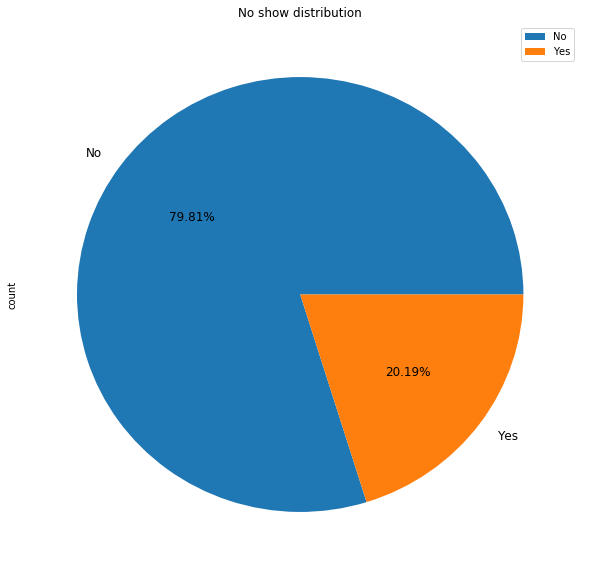

In [13]:
#How many people show up and doesnt shop up

df_Noshow=df[['Scholarship','No_show']]
df_Noshow=df_Noshow.groupby(['No_show'],as_index=False)
df_Noshow=pd.DataFrame(df_Noshow.size().reset_index(name = "count"))
df_Noshow.plot(kind='pie',y='count',autopct='%1.2f%%',labels=df_Noshow['No_show'],fontsize = 12, figsize=(10,10))
plt.title('No show distribution')
df_Noshow.head()



* People who show up on the appoitmant is 79.81%
* People who dindn't show on the appoitmant is 20.19%

## 2. What is a distribution of Gender

,Gender,count
0,F,71839
1,M,38687


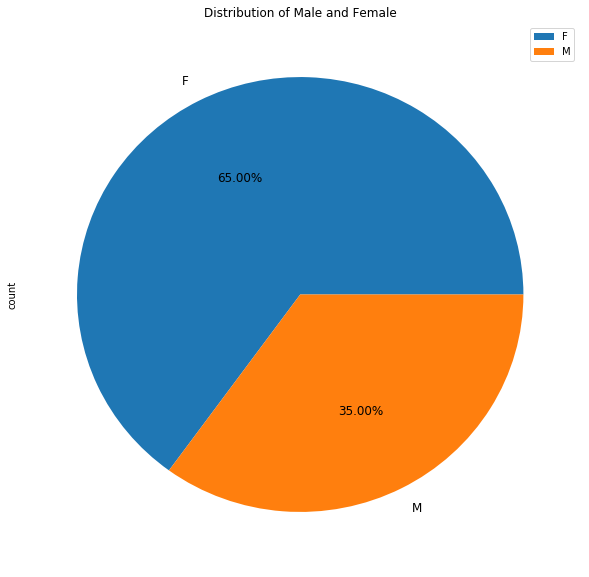

In [14]:
##Procentage of Male/Female to showing on appoitment
df_gender=df[['Gender','No_show']]
df_gender=df_gender.groupby(['Gender'],as_index=False)
df_gender=pd.DataFrame(df_gender.size().reset_index(name = "count"))
df_gender.plot(kind='pie',y='count',autopct='%1.2f%%',labels=df_gender['Gender'],fontsize = 12, figsize=(10,10))
plt.title('Distribution of Male and Female')
df_gender.head()

* Distribution of Male 35%
* Distribution of Female 65%

## 3. What is a no show distribution by gender

,Gender,No_show,count
0,F,No,57245
1,F,Yes,14594
2,M,No,30962
3,M,Yes,7725


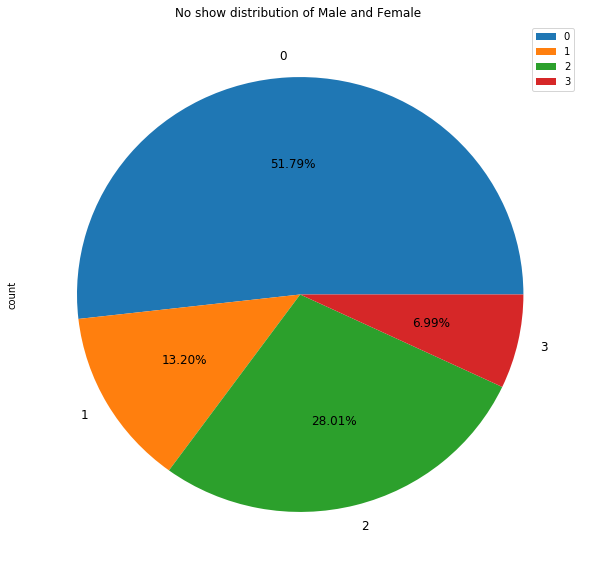

In [15]:
# No show to show by Gender
df_Noshow_gender=df[['Gender','No_show']]
df_Noshow_gender=df_Noshow_gender.groupby(['Gender','No_show'],as_index=False)
df_Noshow_gender=pd.DataFrame(df_Noshow_gender.size().reset_index(name = "count"))
df_Noshow_gender.plot(kind='pie',y='count',autopct='%1.2f%%',fontsize = 12, figsize=(10,10))
plt.title('No show distribution of Male and Female ')
df_Noshow_gender.head()


* No show distribution of Male 6.99
* Show distribution of Male 28.01
* No show distribution of Female 13.2 %
* show distribution of Female 51.79 %

## 4. What is a scholarship distribution by alcoholism


,Scholarship,Alcoholism,count
0,0,0,96833
1,0,1,2832
2,1,0,10333
3,1,1,528


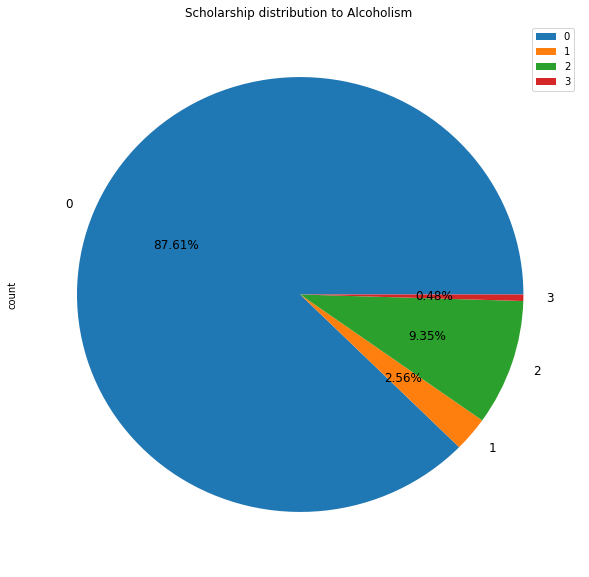

In [16]:
#Scholarship by Alcoholism
df_Scholar_Alco=df[['Scholarship','Alcoholism']]
df_Scholar_Alco=df_Scholar_Alco.groupby(['Scholarship','Alcoholism'],as_index=False)
df_Scholar_Alco=pd.DataFrame(df_Scholar_Alco.size().reset_index(name = "count"))
df_Scholar_Alco.plot(kind='pie',y='count',autopct='%1.2f%%',fontsize = 12, figsize=(10,10))
plt.title('Scholarship distribution to Alcoholism ')
df_Scholar_Alco.head()


* No Sholarship No Alcoholism 87.61 %
* No Sholarship Yes Alcoholism 2.56%
* Yes Sholarship No Alcoholism 9.35 %
* Yes Sholarship Yes Alcoholism 0.48 %

## 5. What is a distribution of scholarship by gender

,Gender,Scholarship,count
0,F,0,62986
1,F,1,8853
2,M,0,36679
3,M,1,2008


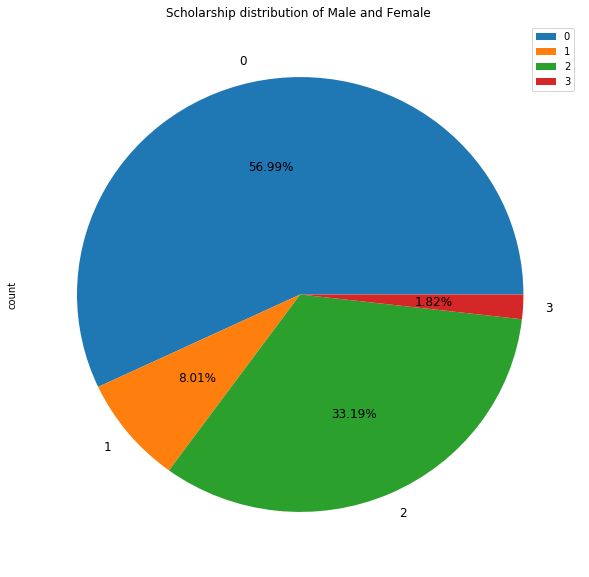

In [17]:
#Scholarship by Gender
df_gender2=df[['Gender','Scholarship']]
df_gender2=df_gender2.groupby(['Gender','Scholarship'],as_index=False)
df_gender2=pd.DataFrame(df_gender2.size().reset_index(name = "count"))
df_gender2.plot(kind='pie',y='count',autopct='%1.2f%%',fontsize = 12, figsize=(10,10))
plt.title('Scholarship distribution of Male and Female ')
df_gender2.head()



* Famele and Scholarship 8.01
* Famele and NO Scholarship 56.99%
* Male and Scholarship 1.82%
* Male and NO Scholarship 33.19 %

## 6. What is the age distribution of no-shows versus shows and mean age ?

34.31766656212196

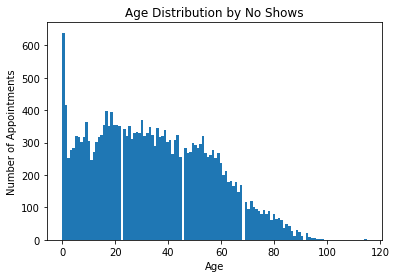

In [18]:
plt.hist(df_noshow_hist, stacked=True, bins=120)
plt.title('Age Distribution by No Shows')
plt.xlabel('Age')
plt.ylabel('Number of Appointments')
df_noshow_hist.mean()

37.790504154999034

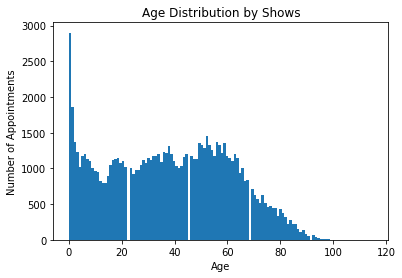

In [19]:
plt.hist(df_show_hist, stacked=True, bins=120)
plt.title('Age Distribution by Shows')
plt.xlabel('Age')
plt.ylabel('Number of Appointments');
df_show_hist.mean()

* As we see the number of no show appointments is in 0-1 the higher point, 15-20 and next high pick - young people, 20-120 going slowly down.
* Mean value in No show - 34
* Mean value in Show - 38
* The difference in means is significant

## Conclusions
* We are not able to answer the question why patients do not come to a designated appointment. For this analysis, more advanced statistical techniques or machine learning are needed.
* The rest of result are below of graphs 


1. What is a distribution of No show

    * People who show up on the appoitmant is 79.81% - 88207
    * People who dindn't show on the appoitmant is 20.19% - 22319

    Its 20 % of applicants, its significant amount
    

2. What i a distribution of Gender

    * Distribution of Male 35% - 38687
    * Distribution of Female 65% - 71839

    The Famele is twice as Male
    

3. What is a no show distribution by gender

    * No show distribution of Male 6.99 - 7725
    * Show distribution of Male 28.01 - 30962
    * No show distribution of Female 13.2 % - 13594
    * show distribution of Female 51.79 % - 57245

    Male(only Male) 19,96 % didn't show up
    
    Female(only Female) 18,92 % didn't show up
    
    Value is similar but we have to remember that male are twice less than female
    

4. What is a scholarship distribution by alcoholism

    * No Sholarship No Alcoholism 87.61 % - 96833
    * No Sholarship Yes Alcoholism 2.56% - 2832
    * Yes Sholarship No Alcoholism 9.35 % - 10333
    * Yes Sholarship Yes Alcoholism 0.48 % - 528

    The number of people taking scholarship and being addicted to alcohol is not significant
    

5. What is a distribution of scholarship by gender

    * Famele and Scholarship 8.01 - 8853
    * Famele and NO Scholarship 56.99% - 62986
    * Male and Scholarship 1.82% - 2008
    * Male and NO Scholarship 33.19 % - 36679

    Famale taking scholarship(Only famale) is 12,32%
    
    Male taking scholarship(Only Male) is 5,1%
    
    Male take subsidies less often than women.


6. What is th age distribution to No/Yes show up and mean age?

    * As we see the number of no show appointments is in 0-1 the higher point
    * 15-20 and next high pick - young people, 
    * 20-120 going slowly down
    * Mean value in No show - 34
    * Mean value in Show - 38
    * The difference in means is significant

    The Mean value no show is lower than show because young people less care about healthy than older


## Limitations

* Age starts with "-1" value (in addition, you could limit the age, for example, from 0 to 100 years)
* Samples are meetings only from Brazil which can affect results, as we don't know, whether it is a random sample, or also data select are partial or impartial.
* We do not know the past of patients, so some data may be inconsistent or random
* The data is only for about 2 months which is also a random measure. To make this noticeable, we should get, for example, from the last ten years, data from the same period of time.